##### Author: Alexander Porter

### **Prerequisites: Import all libraries to be used for this project and declare their aliases.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Human Resources End-to-End Project | **Part 1 - Data Wrangling**

In [ ]:
# Specify the path to your CSV file
file_path = 'HumanResources_dirty.csv'

# Load the dirty dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head() # Some misspelled columns visible

,Employee_ID,First Name,Last Name,Gendr,State,City,Education Levl,Birthdate,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating
0,US-95822412,Zara,Edwards,Female,Florida,Tampa,High School,7/6/2004,4/8/2022,10/5/2022,IT,IT Support Specialist,52110,Good
1,US-28728463,Andrew,Newton,Male,Florida,Jacksonville,Bachelor,12/14/1970,9/3/2022,3/2/2023,Operations,Inventory Specialist,67318,Good
2,US-89254563,Quinn,Riley,Male,Florida,Jacksonville,Bachelor,11/10/1977,4/8/2015,6/15/2018,Sales,Sales Representative,76392,Needs Improvement
3,US-77827638,Nathan,Pena,Male,Texas,Dallas,Bachelor,8/14/1992,12/21/2020,6/19/2021,Sales,Sales Representative,68167,Good
4,US-83140807,Ziva,Carroll,Female,Virginia,Chesapeake,Bachelor,2/15/2000,5/26/2019,5/21/2021,IT,Software Developer,71972,Excellent


### Check column types and row/column counts

In [3]:
df.dtypes # Dates are not datetime type which could indicate issues with the values 

Employee_ID           object
First Name            object
Last Name             object
Gendr                 object
State                 object
City                  object
Education Levl        object
Birthdate             object
Hiredate              object
Termdate              object
Department            object
Job Title             object
Salary                 int64
Performance Rating    object
dtype: object

In [4]:
df.shape # 6827 total rows, 14 columns

(6827, 14)

### Correct misspelled column names

In [5]:
df = df.rename(columns={'Gendr': 'Gender', 'Education Levl': 'Education Level'})
df.head()

,Employee_ID,First Name,Last Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating
0,US-95822412,Zara,Edwards,Female,Florida,Tampa,High School,7/6/2004,4/8/2022,10/5/2022,IT,IT Support Specialist,52110,Good
1,US-28728463,Andrew,Newton,Male,Florida,Jacksonville,Bachelor,12/14/1970,9/3/2022,3/2/2023,Operations,Inventory Specialist,67318,Good
2,US-89254563,Quinn,Riley,Male,Florida,Jacksonville,Bachelor,11/10/1977,4/8/2015,6/15/2018,Sales,Sales Representative,76392,Needs Improvement
3,US-77827638,Nathan,Pena,Male,Texas,Dallas,Bachelor,8/14/1992,12/21/2020,6/19/2021,Sales,Sales Representative,68167,Good
4,US-83140807,Ziva,Carroll,Female,Virginia,Chesapeake,Bachelor,2/15/2000,5/26/2019,5/21/2021,IT,Software Developer,71972,Excellent


### Loop through key string columns and check unique values

In [6]:
# Define the columns to check (adjusting for zero-based indexing in Python)
columns_to_check = [3, 4, 5, 6, 10, 11, 13]

# Loop through specified columns and print unique values
for col in columns_to_check:
    unique_values = df.iloc[:, col].unique()
    print(f'Unique values in column {col + 1}: {unique_values}')

Unique values in column 4: ['Female' 'Male' 'Man' 'Mle' 'Fem']
Unique values in column 5: ['Florida' 'Texas' 'Virginia' 'North Carolina' 'Georgia']
Unique values in column 6: ['Tampa' 'Jacksonville' 'Dallas' 'Chesapeake' 'Miami' 'Raleigh'
 'San Antonio' 'Charlotte' 'Virginia Beach' 'Atlanta' 'Houston'
 'Arlington' 'Durham' 'MIAMI' 'Greensboro' 'Augusta' 'Columbus'
 'Greens.boro' 'dallas']
Unique values in column 7: ['High School' 'Bachelor' 'PhD' 'Master' 'Bacelor' 'HS' 'High Shcool']
Unique values in column 11: ['IT' 'Operations' 'Sales' 'Customer Service' 'Marketing' 'Finance' 'HR']
Unique values in column 12: ['IT Support Specialist' 'Inventory Specialist' 'Sales Representative'
 'Software Developer' 'Help Desk Technician' 'SEO Specialist'
 'Support Specialist' 'Logistics Coordinator'
 'Customer Service Representative' 'Sales Specialist' 'Financial Analyst'
 'System Administrator' 'Content Creator' 'Accountant'
 'Operations Analyst' 'Sales Consultant' 'HR Assistant'
 'Accounts Payab

### Based on the output above, correct all issues related to typos, abbreviations, extra spaces/commas, incosistent casing, etc.

In [7]:
# Column 4
df.replace({'Gender': {'Man':'Male', 'Mle':'Male', 'Fem':'Female'}}, inplace=True)

# Column 6
df['City'] = df['City'].str.strip().str.title()  # Standardize case
df.replace({'City': {'Greens.Boro':'Greensboro'}}, inplace=True)

# Column 7
df.replace({'Education Level': {'Bacelor':'Bachelor', 'HS':'High School', 'High Shcool':'High School'}}, inplace=True)

# Column 12
df.replace({'Job Title': {'Software,Developer':'Software Developer', 
                          'Sales      Representative':'Sales Representative', 
                          'Customer Service, Representative':'Customer Service Representative',
                          'Operations    Manager':'Operations Manager',
                          'Content Creator,,':'Content Creator',
                          'Invent ory Specialist':'Inventory Specialist'}}, inplace=True)

### Loop through corrected columns and verify fixes:

In [8]:
columns_to_check = [3, 5, 6, 11]

for col in columns_to_check:
    unique_values = df.iloc[:, col].unique()
    print(f'Unique values in column {col + 1}: {unique_values}')

Unique values in column 4: ['Female' 'Male']
Unique values in column 6: ['Tampa' 'Jacksonville' 'Dallas' 'Chesapeake' 'Miami' 'Raleigh'
 'San Antonio' 'Charlotte' 'Virginia Beach' 'Atlanta' 'Houston'
 'Arlington' 'Durham' 'Greensboro' 'Augusta' 'Columbus']
Unique values in column 7: ['High School' 'Bachelor' 'PhD' 'Master']
Unique values in column 12: ['IT Support Specialist' 'Inventory Specialist' 'Sales Representative'
 'Software Developer' 'Help Desk Technician' 'SEO Specialist'
 'Support Specialist' 'Logistics Coordinator'
 'Customer Service Representative' 'Sales Specialist' 'Financial Analyst'
 'System Administrator' 'Content Creator' 'Accountant'
 'Operations Analyst' 'Sales Consultant' 'HR Assistant'
 'Accounts Payable Specialist' 'Marketing Coordinator'
 'Customer Service Manager' 'Sales Manager' 'Recruiter' 'IT Manager'
 'HR Coordinator' 'Operations Manager' 'Marketing Manager'
 'Finance Manager' 'HR Manager']


### Find all dates that are not in the standardized MM/DD/YYYY format

In [9]:
# Function to check valid MM/DD/YYYY format
def is_valid_date_format(date_str):
    try:
        pd.to_datetime(date_str, format='%m/%d/%Y')
        return True
    except ValueError:
        return False
    
date_columns = ['Birthdate', 'Hiredate', 'Termdate']

for column in date_columns:
    invalid_dates = df[~df[column].apply(is_valid_date_format)][column]
    if invalid_dates.empty:
        print(f"No invalid '{column}' dates found.\n" )
    else:
        print(f"Invalid '{column}' dates are as follows:",invalid_dates,'\n')

Invalid 'Birthdate' dates are as follows: 273        14/4/1987
970    date 3/7/2002
Name: Birthdate, dtype: object 

Invalid 'Hiredate' dates are as follows: 11    28/2/2023
Name: Hiredate, dtype: object 

Invalid 'Termdate' dates are as follows: 136    term 8/8/2023
945       23/12/2020
Name: Termdate, dtype: object 



### Correct all invalid dates

In [10]:
df.replace({'Birthdate': {'14/4/1987':'4/14/1987', 'date 3/7/2002':'3/7/2002'}}, inplace=True)
df.replace({'Hiredate': {'28/2/2023':'2/28/2023'}}, inplace=True)
df.replace({'Termdate': {'term 8/8/2023':'8/8/2023', '23/12/2020':'12/23/2023'}}, inplace=True)

### Verify date corrections

In [11]:
for column in date_columns:
    invalid_dates = df[~df[column].apply(is_valid_date_format)][column]
    if invalid_dates.empty:
        print(f"No invalid '{column}' dates found.\n" )
    else:
        print(f"Invalid '{column}' dates are as follows:",invalid_dates,'\n')

No invalid 'Birthdate' dates found.

No invalid 'Hiredate' dates found.

No invalid 'Termdate' dates found.



### Convert all date columns to datetime type

In [12]:
for column in date_columns:
    df[column] = pd.to_datetime(df[column], format='%m/%d/%Y') # Format the datetime to MM/DD/YYYY
    print(f"Column '{column}' has been converted to '{df[column].dtype}'")

Column 'Birthdate' has been converted to 'datetime64[ns]'
Column 'Hiredate' has been converted to 'datetime64[ns]'
Column 'Termdate' has been converted to 'datetime64[ns]'


### Check for abnormal outliers in Salary and address accordingly

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate limits for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]

# Identify outliers greater than 200000 as any salaries breaching this figure are extreme and invalid data points
outliers_above_200000 = outliers[outliers['Salary'] > 200000]

if outliers_above_200000.empty:
    print("No 'Salary' outliers found above $200,000.00. All salary values in the data are within range." )
else:
    print("Outliers above $200,000.00:",outliers_above_200000)

No 'Salary' outliers found above $200,000.00. All salary values in the data are within range.


### Trim all string values in the dataframe and identify duplicate rows

In [14]:
# Trim all string values in the DataFrame
trimmed_df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# Identify duplicate rows
duplicates = trimmed_df[trimmed_df.duplicated(keep=False)]

# Print duplicate rows
if duplicates.empty:
    print(f"No invalid duplicate rows found." )
duplicates

,Employee_ID,First Name,Last Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating
9,US-84093639,Violet,Freeman,Female,Florida,Tampa,Bachelor,1979-12-10,2020-12-03,2024-06-23,Sales,Sales Representative,74880,Good
10,US-84093639,Violet,Freeman,Female,Florida,Tampa,Bachelor,1979-12-10,2020-12-03,2024-06-23,Sales,Sales Representative,74880,Good
255,US-51946203,Kiera,Mullins,Female,Florida,Jacksonville,Master,1987-08-12,2018-03-22,2018-09-18,Operations,Operations Analyst,69774,Needs Improvement
256,US-51946203,Kiera,Mullins,Female,Florida,Jacksonville,Master,1987-08-12,2018-03-22,2018-09-18,Operations,Operations Analyst,69774,Needs Improvement
823,US-55816176,Yvette,Mills,Female,Florida,Jacksonville,Bachelor,2001-11-20,2020-06-23,2021-11-01,Operations,Logistics Coordinator,54471,Good
824,US-55816176,Yvette,Mills,Female,Florida,Jacksonville,Bachelor,2001-11-20,2020-06-23,2021-11-01,Operations,Logistics Coordinator,54471,Good
2219,US-80819264,Erik,Oliver,Male,North Carolina,Durham,Bachelor,1984-11-28,2022-05-23,NaT,Customer Service,Customer Service Representative,64616,Satisfactory
2220,US-80819264,Erik,Oliver,Male,North Carolina,Durham,Bachelor,1984-11-28,2022-05-23,NaT,Customer Service,Customer Service Representative,64616,Satisfactory
4368,US-40390409,Aisha,Santiago,Female,Texas,San Antonio,Bachelor,1973-12-12,2016-10-28,NaT,Operations,Inventory Specialist,55453,Good
4369,US-40390409,Aisha,Santiago,Female,Texas,San Antonio,Bachelor,1973-12-12,2016-10-28,NaT,Operations,Inventory Specialist,55453,Good


### Remove all duplicate rows and verify results

In [16]:
clean_df = trimmed_df.drop_duplicates()

duplicates = clean_df[clean_df.duplicated(keep=False)]

if duplicates.empty:
    print(f"No duplicate rows found." )
duplicates

No duplicate rows found.


,Employee_ID,First Name,Last Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating


In [17]:
clean_df.shape # 6820 rows (total employee entries), 7 total duplicates removed 

(6820, 14)

### Identify any columns with missing values and handle appropriately

In [18]:
missing_values = clean_df.isnull().sum()
missing_values = missing_values[missing_values > 0] # show only the columns with missing values

print(missing_values)
print("\nThe missing value count above for 'Termdate' indicates the number of active employees that have not been terminated.")
print("There aren't any other missing values in the dataset, so it is ready for use.")

Termdate    5801
dtype: int64

The missing value count above for 'Termdate' indicates the number of active employees that have not been terminated.
There aren't any other missing values in the dataset, so it is ready for use.


In [19]:
clean_df.dtypes # Everything looks good

Employee_ID                   object
First Name                    object
Last Name                     object
Gender                        object
State                         object
City                          object
Education Level               object
Birthdate             datetime64[ns]
Hiredate              datetime64[ns]
Termdate              datetime64[ns]
Department                    object
Job Title                     object
Salary                         int64
Performance Rating            object
dtype: object

### Export cleaned dataset to a CSV to be used in the Tableau HR Dashboard

In [21]:
clean_df.to_csv('HumanResources.csv', index=False)  # index=False to avoid writing row indices

# Human Resources End-to-End Project | **Part 2 - Exploratory Data Analysis**

In [2]:
# Specify the path to your CSV file
file_path = 'HumanResources.csv'

# Load the clean dataset into a DataFrame
df = pd.read_csv(file_path)

### Summary statistics for numeric variables

In [28]:
df['Salary'].describe()

count      6820.000000
mean      70533.300733
std       14006.958162
min       51518.000000
25%       60686.750000
50%       65916.500000
75%       77724.500000
max      167449.000000
Name: Salary, dtype: float64

### Summary statistics for categorical variables

In [67]:
df.describe(include=['object'])

,Employee_ID,First Name,Last Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,Department,Job Title,Performance Rating
count,6820,6820,6820,6820,6820,6820,6820,6820,6820,1019,6820,6820,6820
unique,6820,625,485,2,5,16,4,5366,2633,785,7,28,4
top,US-95822412,Nina,Maldonado,Female,Florida,Tampa,Bachelor,1983-07-20,2024-04-30,2024-10-27,Operations,Logistics Coordinator,Good
freq,1,71,37,3580,4127,1409,4105,5,432,64,1885,787,3390


### **Ratios and numerical relationships**

In [ ]:
# Count total employees
total_employees = df.shape[0]

# Count terminated employees (where Termdate is not null)
terminated_employees = df['Termdate'].notnull().sum()

# Calculate the proportion of terminated employees
proportion_terminated = terminated_employees / total_employees
proportion_active = 1 - proportion_terminated

print(f"Proportion of Terminated Employees: {proportion_terminated:.2%}")
print(f"Proportion of Active Employees: {proportion_active:.2%}")

Proportion of Terminated Employees: 14.94%
Proportion of Active Employees: 85.06%


In [ ]:
# Create the 'Status' column based on the presence of 'Termdate'
df['Status'] = df['Termdate'].isnull().replace({True: 'Hired', False: 'Terminated'})

# Filter the DataFrame for hired employees
hired_employees = df[df['Status'] == 'Hired']
terminated_employees = df[df['Status'] == 'Terminated']

# Count the total number of hired and terminated employees
total_hired = len(hired_employees)
total_terminated = len(terminated_employees)

# Count the total number of hired and terminated male employees
total_hired_males = hired_employees[hired_employees['Gender'] == 'Male'].shape[0]
total_terminated_males = terminated_employees[terminated_employees['Gender'] == 'Male'].shape[0]

# Count the total number of hired and terminated female employees
total_hired_females = hired_employees[hired_employees['Gender'] == 'Female'].shape[0]
total_terminated_females = terminated_employees[terminated_employees['Gender'] == 'Female'].shape[0]

# Combine genders for grand totals
total_active_employees = total_hired_males + total_hired_females
total_terminated_employees = total_terminated_males + total_terminated_females
total_hired_employees = total_active_employees + total_terminated_employees

# Print the results
print(f'Total Hired Male Employees: {total_hired_males}')
print(f'Total Terminated Male Employees: {total_terminated_males}\n')
print(f'Total Hired Female Employees: {total_hired_females}')
print(f'Total Terminated Female Employees: {total_terminated_females}\n')
print(f'Total Active Employees: {total_active_employees}')
print(f'Total Terminated Employees: {total_terminated_employees}')
print(f'Total Hired Employees: {total_hired_employees}')


Total Hired Male Employees: 2752
Total Terminated Male Employees: 488

Total Hired Female Employees: 3049
Total Terminated Female Employees: 531

Total Active Employees: 5801
Total Terminated Employees: 1019
Total Hired Employees: 6820


#### `Performance Rating` is unrelated to `Salary`

In [51]:
# Calculate the average salary by performance rating
average_salary_by_rating = df.groupby('Performance Rating')['Salary'].mean().reset_index()

# Rename columns for clarity
average_salary_by_rating.columns = ['Performance Rating', 'Average Salary']

average_salary_by_rating = average_salary_by_rating.sort_values(by='Average Salary', ascending=False)

print(average_salary_by_rating)

  Performance Rating  Average Salary
2  Needs Improvement    71669.752941
3       Satisfactory    70592.209412
1               Good    70370.894985
0          Excellent    70339.318239


#### Very weak correlation between `Age` and `Salary`

In [125]:
# Calculate age based on the current date
current_date = pd.Timestamp.now()
df['Age'] = (current_date - df['Birthdate']).dt.days // 365  # Convert days to years

# correlation matrix only for other numerical columns 
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# sort the matrix by 'Age' in descending order and print results
sorted_correlation_matrix = correlation_matrix['Age'].sort_values(ascending=False)
print(sorted_correlation_matrix)

Age                     1.000000
Salary                  0.150128
# Performance Rating    0.080581
Name: Age, dtype: float64


#### Positive correlation between `Education Level` and `Salary`

In [ ]:
# Calculate the average salary by education level
average_salary_by_education = df.groupby('Education Level')['Salary'].mean().reset_index()

# Rename columns for clarity
average_salary_by_education.columns = ['Education Level', 'Average Salary']

average_salary_by_education = average_salary_by_education.sort_values(by='Average Salary', ascending=False)

print(average_salary_by_education)

  Education Level  Average Salary
3             PhD    89184.573770
2          Master    83426.808534
0        Bachelor    68686.324726
1     High School    62847.450174


#### No significant difference in `Performance Rating` by `Department`

In [ ]:
numRating_df = df.copy() #copy original df to avoid modifying it with the numerical mapping

# Quantify 'Performance Rating' to measure differences by Department
rating_mapping = {'Needs Improvement': 1, 'Satisfactory': 2, 'Good': 3, 'Excellent': 4}

# Convert Performance Rating to numeric using the mapping
numRating_df['Performance Rating'] = numRating_df['Performance Rating'].map(rating_mapping)

# Calculate the average performance rating by department
average_performance_by_department = numRating_df.groupby('Department')['Performance Rating'].mean().reset_index()

# Rename columns for clarity
average_performance_by_department.columns = ['Department', 'Average Performance Rating']

average_performance_by_department = average_performance_by_department.sort_values(by='Average Performance Rating', ascending=False)

print(average_performance_by_department)
print("Average Performance Rating range: 1 = Needs Improvement through 4 = Excellent")

         Department  Average Performance Rating
4         Marketing                    2.692078
2                HR                    2.688716
0  Customer Service                    2.686567
1           Finance                    2.673507
5        Operations                    2.649337
6             Sales                    2.647516
3                IT                    2.588816
Average Performance Rating range: 1 = Needs Improvement through 4 = Excellent


#### IT, Finance, and Sales are paid on average, significantly more than Customer Service, HR and Operations

In [47]:
# Calculate the average salary by department and sort in descending order
average_salary_by_department = df.groupby('Department')['Salary'].mean().reset_index()

# Rename columns for clarity
average_salary_by_department.columns = ['Department', 'Average Salary']

# Sort by Average Salary in descending order
average_salary_by_department = average_salary_by_department.sort_values(by='Average Salary', ascending=False)

# Print the result
print(average_salary_by_department)

         Department  Average Salary
3                IT    82129.467105
1           Finance    77423.529851
6             Sales    75730.410714
4         Marketing    67288.321375
0  Customer Service    65667.267871
2                HR    65492.171206
5        Operations    64537.638727


#### Managers have the highest salaries with Finance managers earning the most and Customer Service earning the least. Software developer salaries of 92K are in the managerial salary range of 87K - 126K. For salaries beneath the managerial range, Sales Consultants, Financial Analysts, and Systems Administrators are the highest salaries at 85K and AP Specialists, Content Creators, CSRs, Support Specialists, and Inventory Specialists are the lowest salaries at 61K

In [4]:
# Calculate the average salary by job title and sort in descending order
average_salary_by_jobtitle = df.groupby('Job Title')['Salary'].mean().reset_index()

# Rename columns for clarity
average_salary_by_jobtitle.columns = ['Job Title', 'Average Salary']

# Sort by Average Salary in descending order
average_salary_by_jobtitle = average_salary_by_jobtitle.sort_values(by='Average Salary', ascending=False)

# Print the result
print(average_salary_by_jobtitle)

                          Job Title  Average Salary
5                   Finance Manager   126315.823529
11                       IT Manager   121784.200000
22                    Sales Manager   112187.240000
16                Marketing Manager   102352.583333
18               Operations Manager    94941.611111
25               Software Developer    92847.629108
9                        HR Manager    89145.714286
3          Customer Service Manager    87468.437500
21                 Sales Consultant    85563.851735
6                 Financial Analyst    85429.705584
27             System Administrator    85320.230769
24                 Sales Specialist    76047.324645
0                        Accountant    74202.721698
17               Operations Analyst    73323.700831
20                   SEO Specialist    72369.115385
10             Help Desk Technician    72368.979058
23             Sales Representative    67786.977099
19                        Recruiter    67728.083333
15          

### **Distribution, count, relationship and time series visualizations**

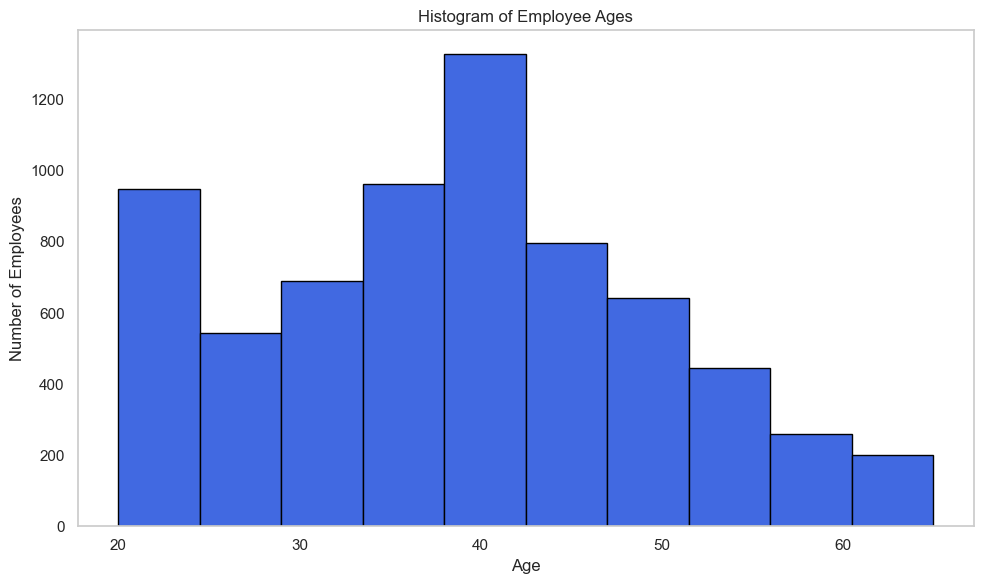

In [141]:
# Ensure 'Birthdate' is in datetime format
df['Birthdate'] = pd.to_datetime(df['Birthdate'])

# Calculate age based on the current date
current_date = pd.Timestamp.now()
df['Age'] = (current_date - df['Birthdate']).dt.days // 365  # Convert days to years

# Plot a histogram of 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, color='royalblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Employee Ages')
plt.xlabel('Age')
plt.ylabel('Number of Employees')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.grid(False)
plt.show()

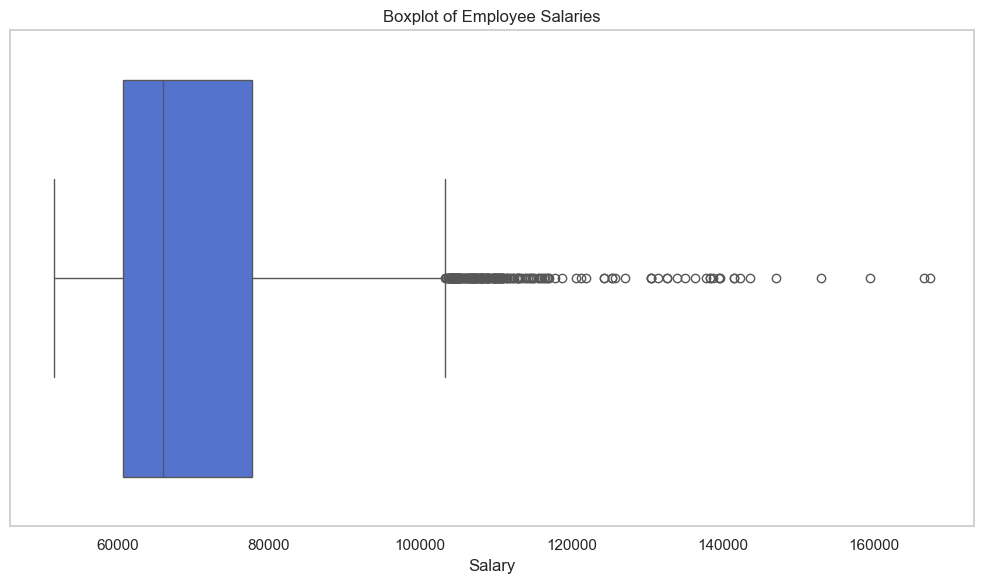

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Salary'], color='royalblue')

# Add titles and labels
plt.title('Boxplot of Employee Salaries')
plt.xlabel('Salary')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.grid(False)
plt.show()

#### Males with a Bachelor's or HS Diploma are paid higher than females with the same education levels, however females with a Master's or PhD are paid more than their male counterparts. 

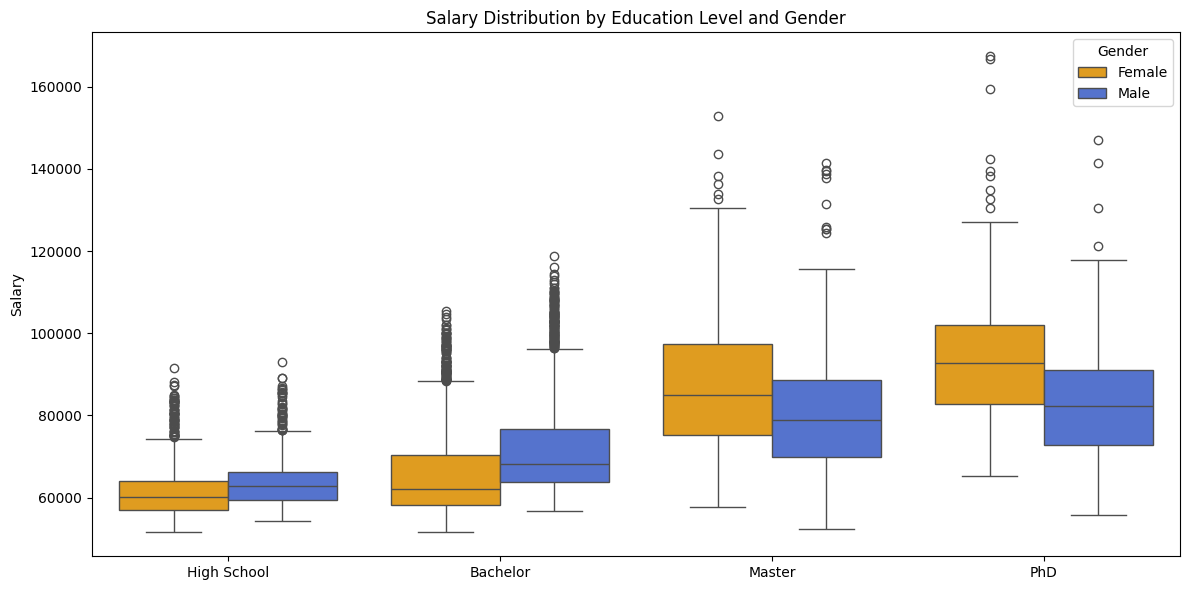

In [3]:
# Setting the order for Education Level
education_order = ['High School', 'Bachelor', 'Master', 'PhD']

plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Salary', hue='Gender', data=df, order=education_order, palette={'Female': 'orange', 'Male':'royalblue'})
plt.title('Salary Distribution by Education Level and Gender')
plt.xlabel('')
plt.ylabel('Salary')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

#### No significant difference in `Performance Rating` by `Education Level` and `Gender`

<Figure size 1200x800 with 0 Axes>

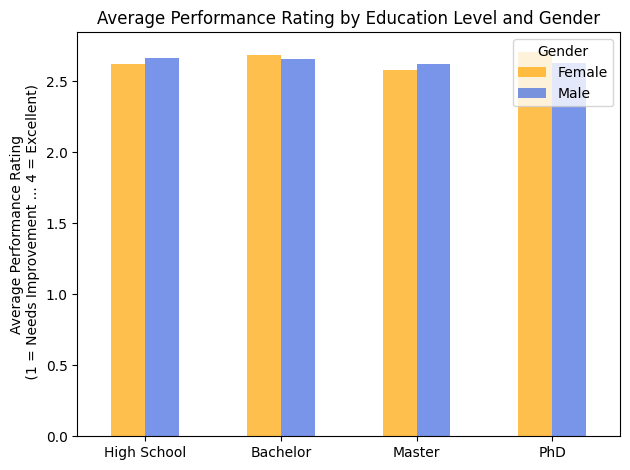

In [6]:
df_copy = df.copy()

rating_mapping = {'Needs Improvement': 1, 'Satisfactory': 2, 'Good': 3, 'Excellent': 4}

# Map the performance ratings to numeric values in the copy
df_copy['Performance Rating Numeric'] = df_copy['Performance Rating'].map(rating_mapping)

# Convert 'Education Level' to a categorical type with the specified order
df_copy['Education Level'] = pd.Categorical(df_copy['Education Level'], categories=education_order, ordered=True)

# Calculate the average performance rating by education level and gender
average_performance = df_copy.groupby(['Education Level', 'Gender'], observed=True)['Performance Rating Numeric'].mean().unstack()

# Plot the average performance rating
plt.figure(figsize=(12, 8))
average_performance.plot(kind='bar', color=['orange', 'royalblue'], alpha=0.7)

# Add titles and labels
plt.title('Average Performance Rating by Education Level and Gender')
plt.xlabel('')
plt.ylabel('Average Performance Rating\n (1 = Needs Improvement ... 4 = Excellent)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the legend
plt.legend(title='Gender')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.grid(False)
plt.show()

#### The majority of employees have attained a Bachelor's degree

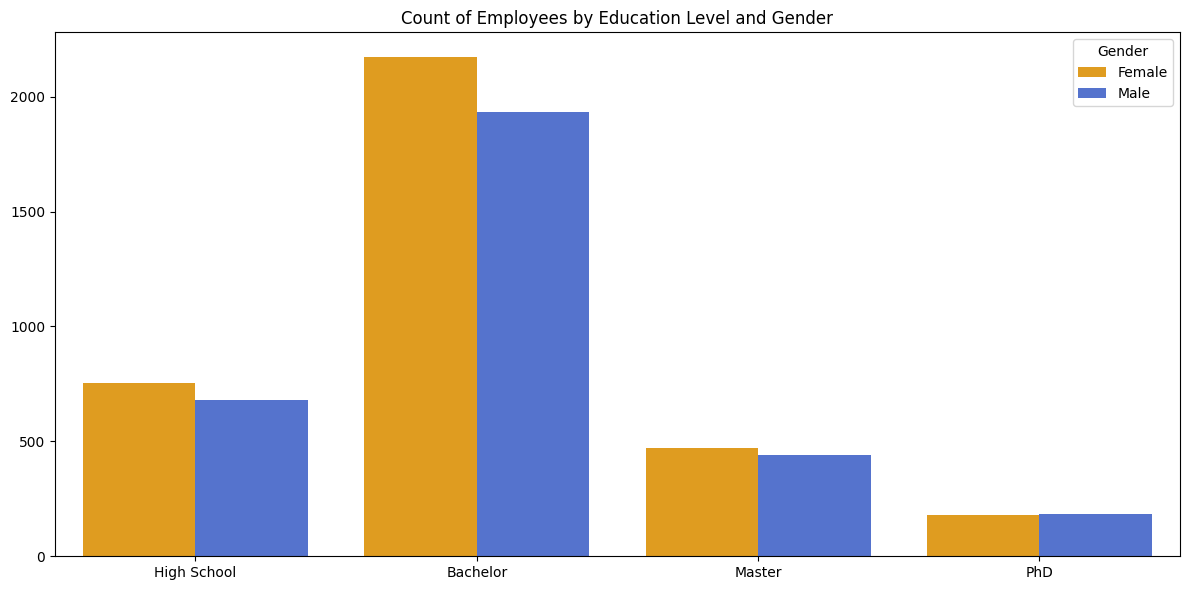

In [28]:
# Group by 'Gender', 'Education Level', 'Performance Rating' and count 'Employee_ID'
count_df = df.groupby(['Gender', 'Education Level']).count().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Education Level', y='Employee_ID', hue='Gender', data=count_df, order=education_order, palette={'Female': 'orange', 'Male':'royalblue'})

# Add titles and labels
plt.title('Count of Employees by Education Level and Gender')
plt.legend(title='Gender')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

#### When comparing `Education Level` and `Age`, the most representative group are employees Aged 35-44 with a Bachelor's

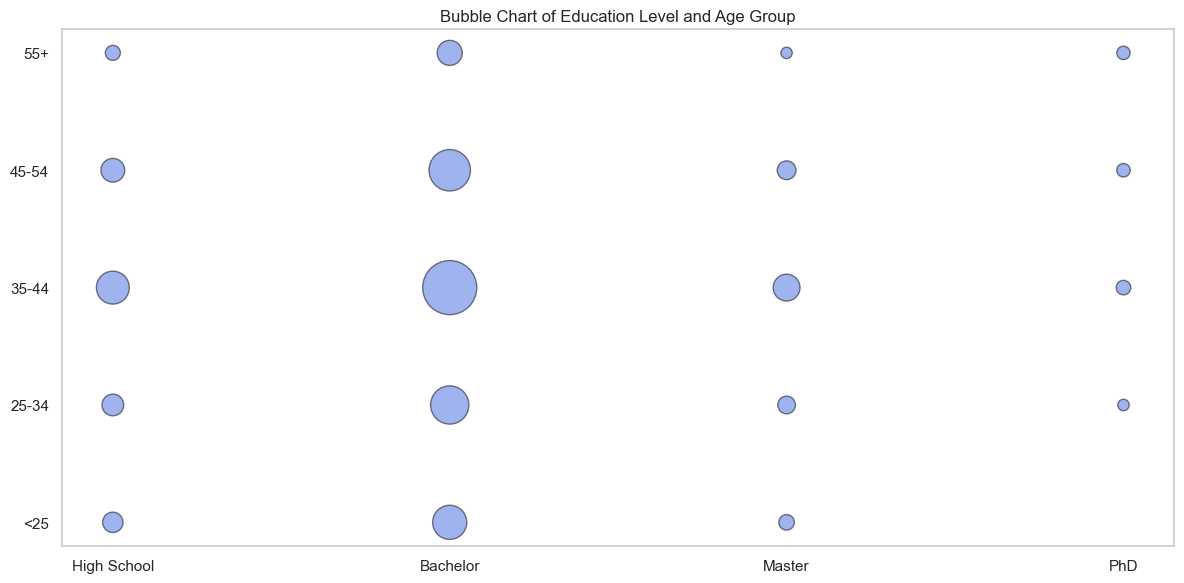

In [148]:
# Ensure 'Birthdate' is in datetime format
df['Birthdate'] = pd.to_datetime(df['Birthdate'])

# Calculate age based on the current date
current_date = pd.Timestamp.now()
df['Age'] = (current_date - df['Birthdate']).dt.days // 365  # Convert days to years

# Define age bins and labels
bins = [0, 25, 34, 44, 54, float('inf')]
labels = ['<25', '25-34', '35-44', '45-54', '55+']

# Create a new column for binned ages
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Set 'Education Level' as a categorical variable with the specified order
df['Education Level'] = pd.Categorical(df['Education Level'], categories=education_order, ordered=True)

# Count the number of employees in each Age Group by Education Level
bubble_data = df.groupby(['Education Level', 'Age Group'], observed=True).size().reset_index(name='Count')

# Create the bubble chart
plt.figure(figsize=(12, 6))
plt.scatter(bubble_data['Education Level'], bubble_data['Age Group'], 
            s=bubble_data['Count'],
            alpha=0.5, color='royalblue', edgecolors='black')

# Add titles and labels
plt.title('Bubble Chart of Education Level and Age Group')
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.grid(False)
plt.show()

#### When comparing `Education Level` and `Performance Rating`, the most representative group are employees with a Bachelor's and rating of Good

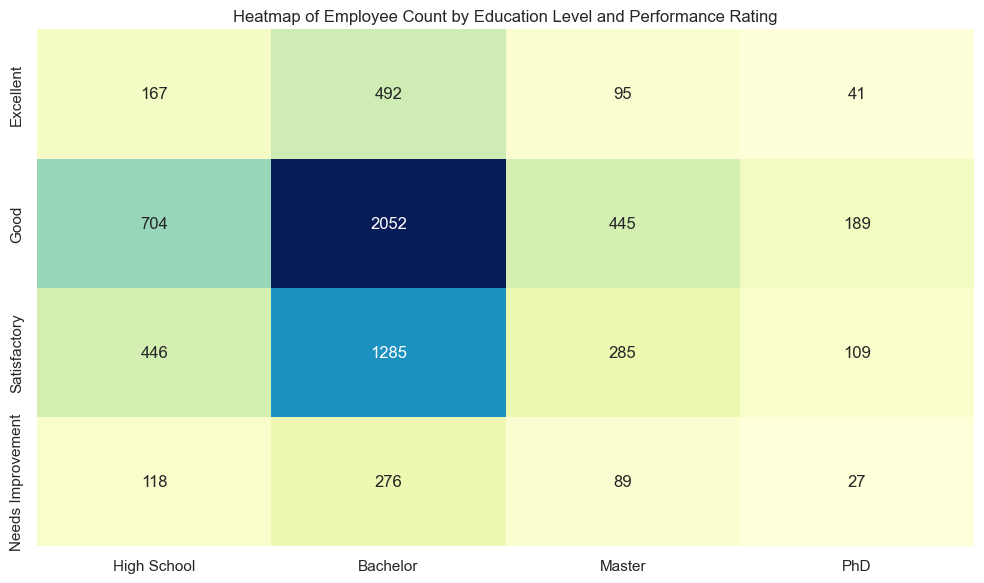

In [ ]:
# reversed order to have y-axis appear in descending order
rating_mapping = {'Excellent': 1, 'Good': 2, 'Satisfactory': 3, 'Needs Improvement': 4}

# Make a copy of the original DataFrame
df_copy = df.copy()

# Map performance ratings to numeric values
df_copy['Performance Rating Numeric'] = df_copy['Performance Rating'].map(rating_mapping)

# Create a pivot table for the heatmap
pivot_table = df_copy.pivot_table(
    index='Performance Rating Numeric',  # Set Performance Rating on y-axis
    columns='Education Level',           # Set Education Level on x-axis
    values='Employee_ID',                # Column to count employees
    aggfunc='count',                     # Count of employees
    fill_value=0,                        # Fill missing values with 0
    observed=True
)

# Reindex the pivot table to ensure the correct order of education levels
pivot_table = pivot_table.reindex(columns=education_order)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu', cbar=False, 
            yticklabels=['Excellent', 'Good', 'Satisfactory', 'Needs Improvement'])

# Add titles and labels
plt.title('Heatmap of Employee Count by Education Level and Performance Rating')
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

#### While the percentage of females hired is slightly higher across the organization, the gender distribution is consistent across departments.

<Figure size 1200x800 with 0 Axes>

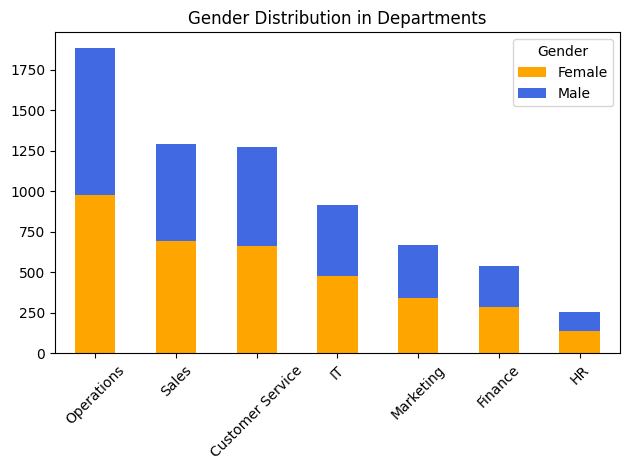

In [18]:
# Count the number of males and females in each department
gender_distribution = df.groupby(['Department', 'Gender']).size().unstack(fill_value=0)

# Sort departments by total number of employees in descending order
gender_distribution['Total'] = gender_distribution.sum(axis=1)
gender_distribution = gender_distribution.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Plot the gender distribution
plt.figure(figsize=(12, 8))
gender_distribution.plot(kind='bar', stacked=True, color=['orange', 'royalblue'])

# Add titles and labels
plt.title('Gender Distribution in Departments')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the legend
plt.legend(title='Gender')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

#### Operations has significantly more employees than other departments and HR has significantly less.

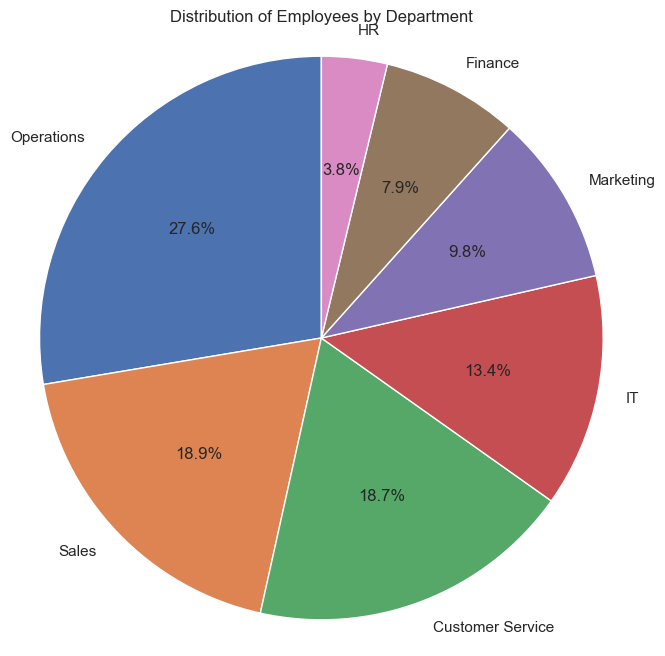

In [72]:
# Count the number of employees in each department
department_counts = df['Department'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Employees by Department')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

#### Nearly half of all employees have attained a performing rating of 'Good', with a significant 7.5% needing improvement.

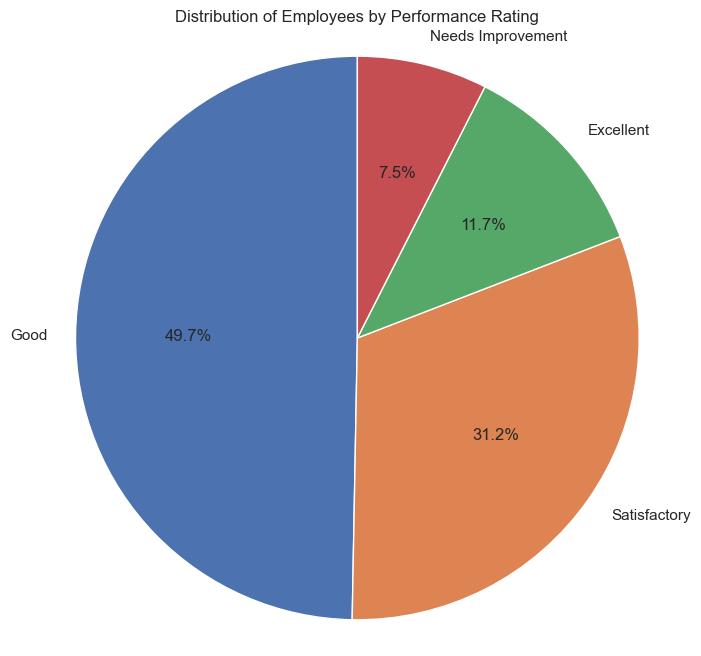

In [75]:
# Count the number of employees in each department
rating_counts = df['Performance Rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Employees by Performance Rating')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

#### The peak year for hiring was in 2017, while the low point was in 2021. Hiring is trending sideways, while terminations continue to trend upward.

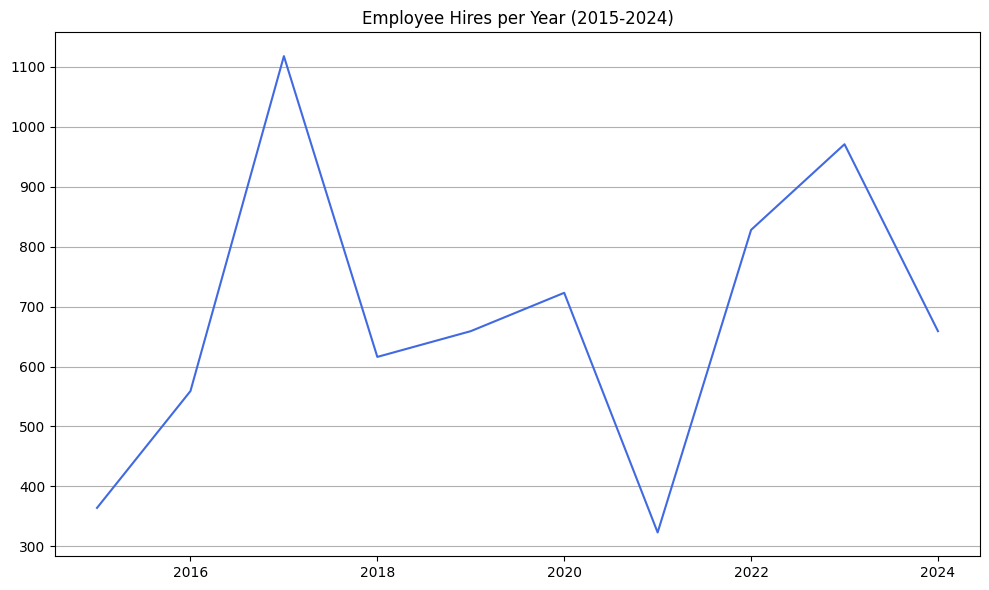

In [15]:
# Convert 'Hiredate' to datetime, if not already done
df['Hiredate'] = pd.to_datetime(df['Hiredate'])

# Group by year and count the number of hires
hirings_per_year = df['Hiredate'].dt.year.value_counts().sort_index()

# Create a time series plot for hires only
plt.figure(figsize=(10, 6))
plt.plot(hirings_per_year.index, hirings_per_year, label='Hires', color='royalblue')

# Adding titles and labels
plt.title('Employee Hires per Year (2015-2024)')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

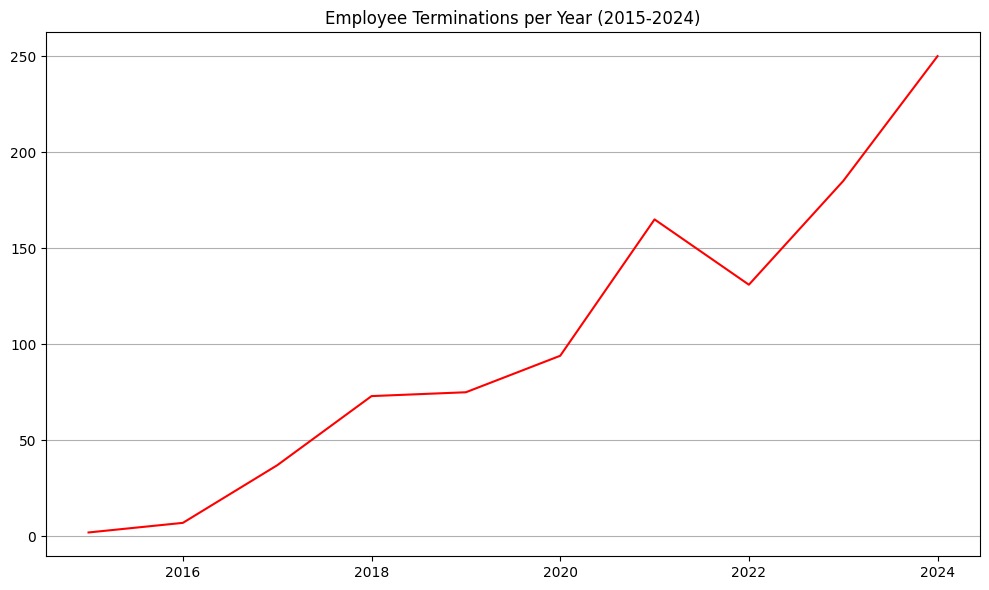

In [29]:
# Convert 'Termdate' to datetime, if not already done
df['Termdate'] = pd.to_datetime(df['Termdate'])

# Group by year and count the number of terminations
terminations_per_year = df['Termdate'].dt.year.value_counts().sort_index()

# Create a time series plot for terminations only
plt.figure(figsize=(10, 6))
plt.plot(terminations_per_year.index, terminations_per_year, color='red')

# Adding titles and labels
plt.title('Employee Terminations per Year (2015-2024)')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

#### Supplemental table for the presentation

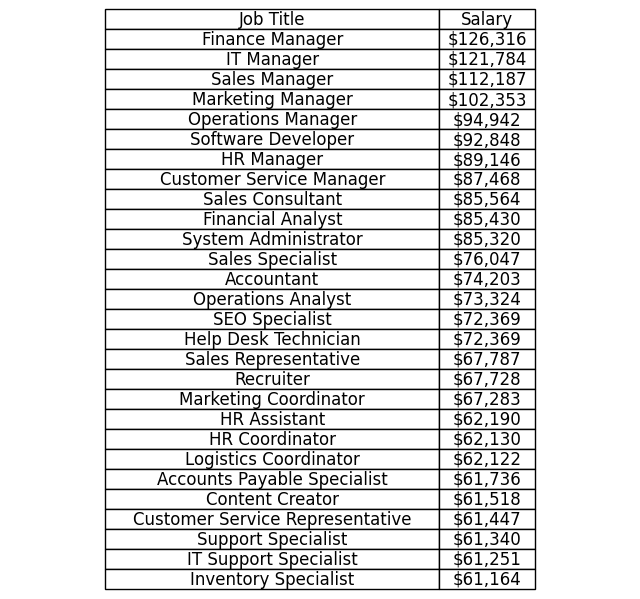

In [5]:
# Calculate the average salary for each job title
average_salaries = df.groupby('Job Title')['Salary'].mean().reset_index()

# Sort the DataFrame based on the numeric salary before formatting
average_salaries = average_salaries.sort_values(by='Salary', ascending=False)

# Format Salary as currency after sorting
average_salaries['Salary'] = average_salaries['Salary'].apply(lambda x: f"${x:,.0f}")

# Create a table using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))  # Adjusting the figure size for a narrower table
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=average_salaries.values, colLabels=average_salaries.columns, cellLoc='center', loc='center')

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.2)  # Minimize cell width, adjust height as needed

# Adjust column widths
for i in range(len(average_salaries.columns)):
    table.auto_set_column_width(i)
    table[i, 0].set_width(0.2)  # Set width for 'Job Title' column
    table[i, 1].set_width(0.1)  # Set width for 'Salary' column

# Show the plot
plt.show()

# Human Resources End-to-End Project | **Part 3 - Tableau Dashboard**

**https://public.tableau.com/app/profile/alexander.j.porter/viz/2024HumanResourcesDashboard/Summary**

# Human Resources End-to-End Project | **Part 4 - Presentation**

**https://github.com/Alexander-J-Porter/Human-Resources-End-to-End-Project-using-Python-Tableau/blob/main/Human_Resources_Presentation.pdf**